
<img src="https://miro.medium.com/v2/resize:fit:1400/1*zSk0qdSj7E70uaOW4hVzkg.png" width="480px">

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [50]:
def generate_dataset(n):
    apple_width = np.random.normal(6,1,n)
    apple_length = np.random.normal(6,1,n)
    banana_width = np.random.normal(4,1,n)
    banana_length = np.random.normal(8,1,n)

    width = np.concatenate((apple_width,banana_width))
    length = np.concatenate((apple_length,banana_length))
    X = np.array([width,length]).T

    Y_apples = np.zeros(n,dtype="int")
    Y_bananas = np.ones(n,dtype="int")
    Y = np.concatenate((Y_apples,Y_bananas))
    
    return X,Y


In [51]:
X_train, Y_train = generate_dataset(100)

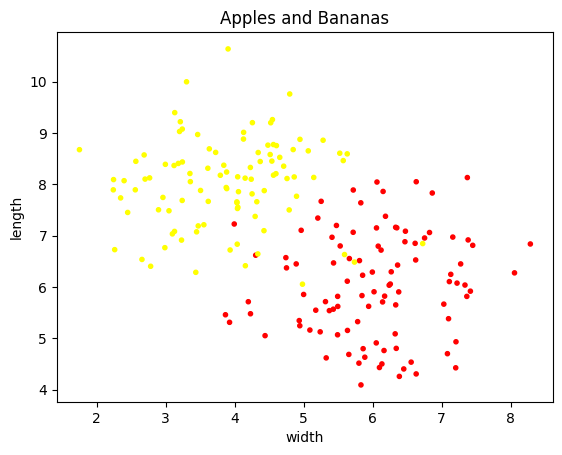

In [52]:
cmap=["red","yellow"]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=ListedColormap(cmap),marker=".")

plt.title("Apples and Bananas")
plt.xlabel("width")
plt.ylabel("length")
plt.show()

In [53]:
# class KNN:
#     def __init__(self, k):
#         self.k = k
    
#     # training
#     def fit(self, X, Y):
#         self.X_train = X
#         self.Y_train = Y
    
#     def euclidean_distance(self, x1, x2):
#         return np.sqrt(np.sum((x1 - x2) ** 2))
    
#     def predict(self, X):
#         Y = []
#         for x in X:
#             distances = []
#             for x_train in self.X_train:
#                 d = self.euclidean_distance(x, x_train)
#                 distances.append(d)

#             nearest_neighbors = np.argsort(distances)[:self.k]
#             result = np.bincount(self.Y_train[nearest_neighbors])
#             y = np.argmax(result)
#             Y.append(y)

#         return Y

#     def evaluate(self, X, Y):
#         y_pred = self.predict(X)
#         accuracy = np.sum(y_pred == Y) / len(Y)
#         return accuracy


In [67]:
from knn import KNN


In [68]:
knn = KNN(k=5)
knn.fit(X_train,Y_train)

In [69]:
new_fruit_1 = np.array([3, 8])
new_fruit_2 = np.array([6, 6])
new_fruit_3 = np.array([4, 7])

new_fruits = np.array([new_fruit_1, new_fruit_2, new_fruit_3])

outputs = knn.predict(new_fruits)

In [70]:
for output in outputs:
    if output == 0:
        print("🍎")
    else:
        print("🍌")


🍌
🍎
🍌


In [71]:
X_test, Y_test = generate_dataset(90)

In [72]:
knn.evaluate(X_test, Y_test)

0.9388888888888889

In [ ]:
Y_pred = knn.predict(X_test)
Y_pred

In [74]:
confusion_matrix = np.zeros((2,2))

for i in range(180):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:        
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1: 
        confusion_matrix[1][1] += 1
    
confusion_matrix

array([[88.,  2.],
       [ 9., 81.]])

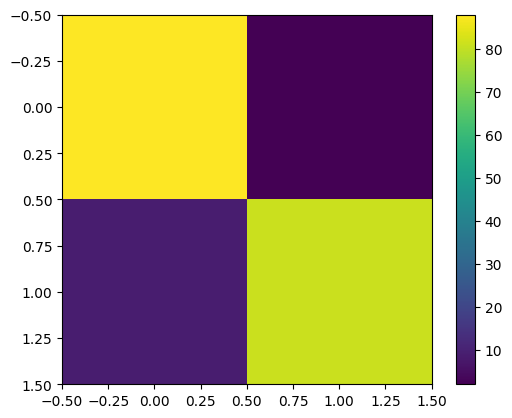

In [75]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

Sckitlearn 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

knn.predict(new_fruits)

array([1, 0, 1])

In [77]:
knn.score(X_test,Y_test)

0.9388888888888889